battery_power : 배터리가 한 번에 저장할 수 있는 총 에너지(mAh)

파란색 : 블루투스 있음 또는 없음

clock_speed : 마이크로프로세서가 명령을 실행하는 속도

dual_sim : 듀얼 sim 지원 여부

fc : 전면 카메라 메가픽셀

4_g : 4G 유무

int_memory : 내장 메모리(기가바이트)

m_dep : 이동 깊이(cm)

mobile_wt : 휴대폰 무게

n_cores : 프로세서 코어 수

pc : 기본 카메라 메가픽셀

px_높이 : 픽셀 해상도 높이

px_width : 픽셀 해상도 너비

ram : 랜덤 액세스 메모리(메가바이트)

sc_h : 모바일의 화면 높이(cm)

sc_w : 모바일의 화면 너비(cm)

talk_time : 단일 배터리 충전이 지속되는 가장 긴 시간은 다음과 같습니다

3_g : 3G 유무

touch_screen : 터치 스크린 유무

wifi : wifi 유무

- phone_train.csv
- phone_test.csv

label : price_range, 분류를 해야지

In [3]:
import pandas as pd
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

phone = pd.read_csv('./datasets/phone_train.csv')

y_target=phone['price_range']
X_data= phone.drop('price_range',axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.33, random_state=42)

dt_clf = DecisionTreeClassifier(random_state=0)

dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)

In [32]:
phone.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [4]:
dt_clf.feature_importances_

array([0.13664879, 0.00398021, 0.00713123, 0.00132674, 0.00646973,
       0.        , 0.00754703, 0.00601978, 0.01341657, 0.00912246,
       0.00379681, 0.09242747, 0.07670035, 0.60745016, 0.00550937,
       0.00579033, 0.01110475, 0.00257307, 0.00149258, 0.00149258])

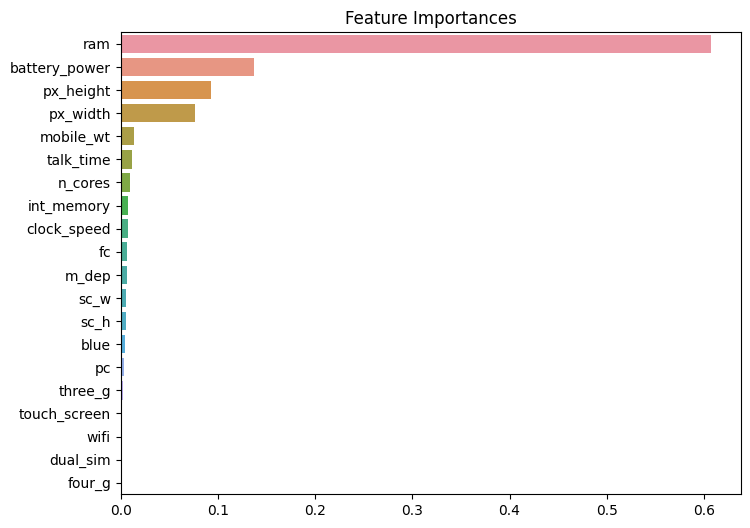

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

ftr_importance_values = dt_clf.feature_importances_
ftr_importances = pd.Series(ftr_importance_values, index = X_train.columns)
ftr_top = ftr_importances.sort_values(ascending=False)
plt.figure(figsize=(8,6))
plt.title('Feature Importances')
sns.barplot(x=ftr_top, y=ftr_top.index)
plt.show()

In [10]:
phone2 = phone[['ram', 'battery_power', 'px_height', 'px_width', 'price_range']]

In [11]:
phone2

,ram,battery_power,px_height,px_width,price_range
0,2549,842,20,756,1
1,2631,1021,905,1988,2
2,2603,563,1263,1716,2
3,2769,615,1216,1786,2
4,1411,1821,1208,1212,1
...,...,...,...,...,...
1995,668,794,1222,1890,0
1996,2032,1965,915,1965,2
1997,3057,1911,868,1632,3
1998,869,1512,336,670,0


In [25]:
import pandas as pd
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [26]:
y_target=phone2['price_range']
X_data= phone2.drop('price_range',axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.2, random_state=42)

In [27]:
# 개별 모델은 로지스틱 회귀와 KNN임
lr_clf = LogisticRegression()
knn_clf = KNeighborsClassifier(n_neighbors=8)

# 개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현한 분류기
vo_clf = VotingClassifier( estimators=[('LR',lr_clf),('KNN',knn_clf)], voting = 'soft')

# VotingClassifier 학습/예측/평가
vo_clf.fit(X_train, y_train)
pred = vo_clf.predict(X_test)
print('Voting 분류기 정확도:{0:.4f}'.format(accuracy_score(y_test, pred)))

# 개별 모델의 학습/에측/평가
classifiers = [lr_clf, knn_clf]
for classifier in classifiers:
    classifier.fit(X_train, y_train)
    pred = classifier.predict(X_test)
    class_name = classifier.__class__.__name__
    #print('{0} 정확도: {1:.4f}'.foramt(class_name, accuracy_score(y_test,pred)))
    print('{0} 정확도: {1:4f}'.format(class_name,accuracy_score(y_test,pred)))

Voting 분류기 정확도:0.9675
LogisticRegression 정확도: 0.972500
KNeighborsClassifier 정확도: 0.942500


In [28]:
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy))

랜덤 포레스트 정확도: 0.9425


In [29]:
dt_clf = DecisionTreeClassifier(random_state=0 , max_depth=5)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
print('Decision Tree 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

Decision Tree 정확도: 0.8075


In [33]:
import xgboost as xgb ## XGBoost 불러오기
from xgboost import plot_importance ## Feature Importance를 불러오기 위함

# 넘파이 형태의 학습 데이터 세트와 테스트 데이터를 DMatrix로 변환하는 예제
dtrain = xgb.DMatrix(data=X_train, label = y_train)
dtest = xgb.DMatrix(data=X_test, label=y_test)

params = {'max_depth' : 3,
         'eta' : 0.1, 
         'objective' : 'binary:logistic',
         'eval_metric' : 'logloss',
         'early_stoppings' : 100 }

num_rounds = 400

# train 데이터 세트는 'train', evaluation(test) 데이터 세트는 'eval' 로 명기
wlist = [(dtrain, 'train'), (dtest,'eval')]
# 하이퍼 파라미터와 early stopping 파라미터를 train() 함수의 파라미터로 전달
xgb_model = xgb.train(params = params, dtrain=dtrain, num_boost_round=num_rounds, evals=wlist)

pred_probs = xgb_model.predict(dtest)

accuracy = accuracy_score(y_test, y_pred)

print('정확도: {:.4f}'.format(accuracy))

[17:22:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "early_stoppings" } are not used.



XGBoostError: [17:22:39] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:148: label must be in [0,1] for logistic regression